# Lead Scoring Case Study


## 1. Reading and understanding the data

In [261]:
#importing liabraris required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('Leads.csv')
df.shape

(9240, 37)

In [3]:
#there are total 37 columns and 9240 rows

In [4]:
pd.set_option('display.max_columns',100)

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2. Cleaning Data

In [7]:
df.columns[df.isna().any()].tolist()

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [8]:
# all above columns have null values in them

In [9]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
# In problem statement it was told that many columns have 'Select' as value in them which is equivalent to null values
# So lets impute null in place of Select

In [11]:
df = df.replace('Select', np.NaN)

In [12]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
#As we have updated 'Select' as null values, percentage of  null values present in some columns increased.

In [14]:
#We can drop columns with more than 45% null values in them as they have insufficient data to carry analysis
df.drop(df.loc[:, df.columns[df.isnull().mean()*100>=45]], axis=1,inplace=True)
df.shape

(9240, 30)

In [15]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [16]:
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [17]:
#There are still some columns with considerable null values

In [18]:
#lets further clean data by dropping rows which contain more than 75% null values
df.dropna(axis=0,thresh=0.25*df.shape[1],inplace=True)
df.shape

(9240, 30)

In [19]:
#llets try with 45% same as column if there are any
df.dropna(axis=0,thresh=0.55*df.shape[1],inplace=True)
df.shape

(9240, 30)

In [20]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [21]:
#There are no rows with much missing data

In [22]:
#Lets do qulity check on categorical variables to see if they have any invalid Categories.
df.select_dtypes(include='object').columns.tolist()

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [23]:
# 'Prospect ID' and 'Lead Number' are like indexes of dataframe, we will keep only one in dataframe as both are unique

In [24]:
# Analyzing 'Lead Origin' Column
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [25]:
df['Lead Origin'].isna().sum()

0

In [26]:
# Quick add form is only having 1 count so we can club it with Lead Add Form

In [27]:
df['Lead Origin'] = df['Lead Origin'].replace('Quick Add Form','Lead Add Form')

In [28]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               719
Lead Import                  55
Name: Lead Origin, dtype: int64

we clubbed 'Lead Add Form', 'Lead Import' and 'Quick Add Form' in one category as they have significanltly low value
counts compared to others in the category

In [29]:
# Analyzing 'Lead Source' Column
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [30]:
df['Lead Source'].isna().sum()

36

In [31]:
# as we can see there are two Google with different spellings so lets make them one
# also there are very few null values which we can replace with Mode of the column which is Google

In [32]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [33]:
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

In [34]:
df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [35]:
# there are categories which are very less in number we can club them in one catergory

In [36]:
df['Lead Source'].value_counts()[df['Lead Source'].value_counts()<200].index.tolist()

['Welingak Website',
 'Referral Sites',
 'Facebook',
 'bing',
 'Click2call',
 'Social Media',
 'Live Chat',
 'Press_Release',
 'Pay per Click Ads',
 'blog',
 'WeLearn',
 'welearnblog_Home',
 'youtubechannel',
 'testone',
 'NC_EDM']

In [37]:
df['Lead Source'] = df['Lead Source'].replace(df['Lead Source'].value_counts()[df['Lead Source'].value_counts()<200].index.tolist(), 'others')

In [38]:
df['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
others             345
Name: Lead Source, dtype: int64

we could have clubbed Reference with others too but usually students coming through references are the ones with high possiblity of joining course as refernce is someone they trust. lets see later in model if it is significant or not

In [39]:
# Analyzing 'Do Not Email' Column
df['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [40]:
df['Do Not Email'].isna().sum()

0

In [41]:
(df['Do Not Email']=='Yes').sum()/len(df['Do Not Email'])*100

7.9437229437229435

In [42]:
df.drop('Do Not Email', axis = 1, inplace = True)

'Do Not Email' variable is biased, we have taken call to drop it

In [43]:
# Analyzing 'Do Not Call' Column
df['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [44]:
df['Do Not Call'].isna().sum()

0

In [45]:
df.drop('Do Not Call', axis = 1, inplace = True)

'Do Not Call' variable is heavily biased hence we dropped the column

In [46]:
# Analyzing 'Last Activity' Column
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [47]:
df['Last Activity'].isna().sum()

103

In [48]:
# Null value count is very low so we will impute it with the mode
df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace=True)

In [49]:
df['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
#Lets club all the categories with count less than 700

In [51]:
df['Last Activity'].value_counts()[df['Last Activity'].value_counts()<700].index.tolist()

['Page Visited on Website',
 'Converted to Lead',
 'Email Bounced',
 'Email Link Clicked',
 'Form Submitted on Website',
 'Unreachable',
 'Unsubscribed',
 'Had a Phone Conversation',
 'Approached upfront',
 'View in browser link Clicked',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [52]:
df['Last Activity'] = df['Last Activity'].replace(df['Last Activity'].value_counts()[df['Last Activity'].value_counts()<700].index.tolist(), 'other_activity')

In [53]:
df['Last Activity'].value_counts()

Email Opened               3540
SMS Sent                   2745
other_activity             1982
Olark Chat Conversation     973
Name: Last Activity, dtype: int64

As the count of some categories were to small we clubbed them together in 'other_activity' category

In [54]:
# Analyzing 'Country' Column
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [55]:
df[df['Country']!='India'].value_counts().sum() # no. of candidates from other country than India

161

In [56]:
df['Country'].isna().sum()

2461

In [57]:
df.drop('Country',axis=1, inplace=True)

 here we can see India have the most number of students compaered to others, this column is highly biased and also have many null values. hence we dropped the column.

In [58]:
# Analyzing 'Specialization' Column
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [59]:
df['Specialization'].isna().mean()*100

36.58008658008658

In [60]:
# 'Specialization' Column have lots of null values. if we imputed with mode then the column will become too biased
# we have to drop the column
df.drop('Specialization',axis=1,inplace=True)

In [61]:
# Analyzing 'What is your current occupation' Column
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [62]:
df['What is your current occupation'].isna().sum()

2690

In [63]:
# we can see there are considerable amount of null values in this column also it is highly biased towards Unemployed category.
# Housewife and student are generally comes under Unemployed category which maked it more biased
# so we can drop this column

In [64]:
df.drop('What is your current occupation',axis=1,inplace=True)

In [65]:
# Analyzing 'What matters most to you in choosing a course' Column
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [66]:
df['What matters most to you in choosing a course'].isna().sum()

2709

In [67]:
# Again this column has close to none variability also null values are high which makes case even bad
# So we can drop this column too

In [68]:
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [69]:
# Analyzing 'Search' Column
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [70]:
df['Search'].isna().sum()

0

In [71]:
# 'Search' column is also biased and wont be of much use in the model so we will drop it
df.drop('Search',axis=1,inplace=True)

In [72]:
# Analyzing 'Magazine' Column
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [73]:
df['Magazine'].isna().sum()

0

In [74]:
# 'Magazine' column is also biased and wont be of much use in the model so we will drop it
df.drop('Magazine',axis=1,inplace=True)

In [75]:
# Analyzing 'Newspaper Article' Column
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [76]:
df['Newspaper Article'].isna().sum()

0

In [77]:
# 'Newspaper Article' column is also biased and wont be of much use in the model so we will drop it
df.drop('Newspaper Article',axis=1,inplace=True)

In [78]:
# Analyzing 'X Education Forums' Column
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [79]:
df['X Education Forums'].isna().sum()

0

In [80]:
# 'X Education Forums' column is also biased and wont be of much use in the model so we will drop it
df.drop('X Education Forums',axis=1,inplace=True)

In [81]:
# Analyzing 'Newspaper' Column
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [82]:
df['Newspaper'].isna().sum()

0

In [83]:
# 'Newspaper' column is also biased and wont be of much use in the model so we will drop it
df.drop('Newspaper',axis=1,inplace=True)

In [84]:
# Analyzing 'Digital Advertisement' Column
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [85]:
df['Digital Advertisement'].isna().sum()

0

In [86]:
# 'Digital Advertisement' column is also biased and wont be of much use in the model so we will drop it
df.drop('Digital Advertisement',axis=1,inplace=True)

In [87]:
# Analyzing 'Through Recommendations' Column
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [88]:
df['Through Recommendations'].isna().sum()

0

In [89]:
# 'Through Recommendations' column is also biased and wont be of much use in the model so we will drop it
df.drop('Through Recommendations',axis=1,inplace=True)

In [90]:
# Analyzing 'Receive More Updates About Our Courses' Column
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [91]:
# 'Receive More Updates About Our Courses' column is also biased and wont be of much use in the model so we will drop it
df.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [92]:
# Analyzing 'Tags' Column
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [93]:
df['Tags'].isna().mean()

0.36287878787878786

In [94]:
#lets impute null values with mode
df['Tags'].fillna(df['Tags'].mode()[0],inplace=True)

In [95]:
df['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [96]:
df['Tags'].value_counts()[df['Tags'].value_counts()<300].index.tolist()

['switched off',
 'Busy',
 'Lost to EINS',
 'Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'Shall take in the next coming month',
 'University not recognized',
 'Recognition issue (DEC approval)']

In [97]:
# Also there are categories with very few counts so clubbing less than 300 count categories together in 'other'
df['Tags'] = df['Tags'].replace(df['Tags'].value_counts()[df['Tags'].value_counts()<300].index.tolist(),'other')

In [98]:
df['Tags'].value_counts()

Will revert after reading the email    5425
other                                  1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

In [99]:
# Analyzing 'Update me on Supply Chain Content' Column
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [100]:
# 'Update me on Supply Chain Content' column is also biased and wont be of much use in the model so we will drop it
df.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [101]:
# Analyzing 'Get updates on DM Content' Column
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [102]:
# 'Get updates on DM Content' column is also biased and wont be of much use in the model so we will drop it
df.drop('Get updates on DM Content',axis=1,inplace=True)

In [103]:
# Analyzing 'City' Column
df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [104]:
df['City'].isna().sum()

3669

In [105]:
# 'City' column is also biased and wont be of much use in the model. Also its categories are mostly related to maharashtra. so we will drop it
df.drop('City',axis=1,inplace=True)

In [106]:
# Analyzing 'I agree to pay the amount through cheque' Column
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [107]:
# 'I agree to pay the amount through cheque' column is also biased and wont be of much use in the model so we will drop it
df.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [108]:
# Analyzing 'A free copy of Mastering The Interview' Column
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [109]:
df['A free copy of Mastering The Interview'].isna().sum()

0

In [110]:
# Analyzing 'Last Notable Activity' Column
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [111]:
df['Last Notable Activity'].isna().sum()

0

In [112]:
#lets club categories with count less than 500 togeher in 'other'
df['Last Notable Activity'].value_counts()[df['Last Notable Activity'].value_counts()<500].index.tolist()

['Page Visited on Website',
 'Olark Chat Conversation',
 'Email Link Clicked',
 'Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [113]:
df['Last Notable Activity']=df['Last Notable Activity'].replace(df['Last Notable Activity'].value_counts()[df['Last Notable Activity'].value_counts()<500].index.tolist(),'other')

In [114]:
df['Last Notable Activity'].value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
other            834
Name: Last Notable Activity, dtype: int64

In [115]:
# This concludes our analys of indivisual coategorical variables
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,other_activity,Interested in other courses,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Ringing,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Will revert after reading the email,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,other_activity,Ringing,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,other_activity,Will revert after reading the email,No,Modified


In [116]:
df.shape

(9240, 12)

In [117]:
# We are left with 12 Columns out of these we can drop 'Prospect ID' as 'Lead Number' is also there which is unique variable

In [118]:
df.drop('Prospect ID', axis=1, inplace=True)

In [119]:
df.shape

(9240, 11)

In [120]:
# We now have 11 columns
# Lets analyse Continous variables

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [122]:
num_var = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

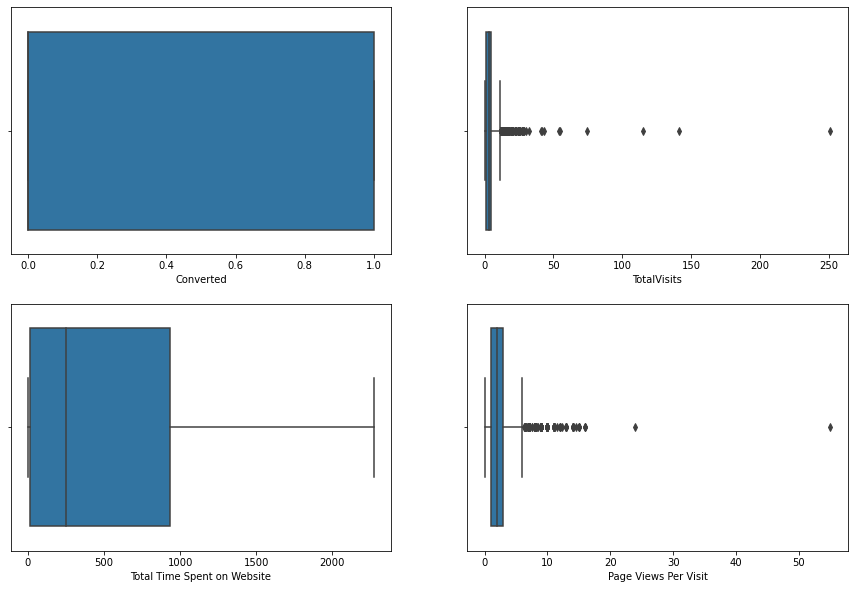

In [123]:
plt.figure(figsize=(15,10))
for i in enumerate(num_var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(i[1], data=df)
plt.show()

In [124]:
#lets look at 'TotalVisits' variable
df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [125]:
df['TotalVisits'].isna().sum()

137

In [126]:
# We can make 'TotalVisits' as a categorical variable as it has very limited values spread accross certail range ( 0 to 251)
# first lets take care of missing data by imputing with mode
df['TotalVisits'].fillna(df['TotalVisits'].mode()[0],inplace=True)

In [127]:
df['TotalVisits'].isna().sum()

0

In [128]:
#we will bin the categories of the total visits into '0', '1-4', '4+' category
df['TotalVisits']=df['TotalVisits'].apply(lambda x: '0' if x==0 else '1-4' if x<5 else '4+')
df['TotalVisits'].value_counts()

1-4    4501
4+     2413
0      2326
Name: TotalVisits, dtype: int64

In [129]:
df['TotalVisits'] = df['TotalVisits'].astype(str)

In [130]:
#lets look at 'Total Time Spent on Website' variable
df['Total Time Spent on Website'].value_counts()

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [131]:
# this variable will stay numeric as it has lots of values

In [132]:
df['Total Time Spent on Website'].isna().sum()

0

In [133]:
# we can use this variable as it is as it dont have null values and also no outliers as can be seen in above plots

In [134]:
#lets look at 'Page Views Per Visit' variable
df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [135]:
df['Page Views Per Visit'].isna().sum()

137

In [136]:
#first lets impute null values with mode
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mode()[0],inplace=True)

In [137]:
df['Page Views Per Visit'].isna().sum()

0

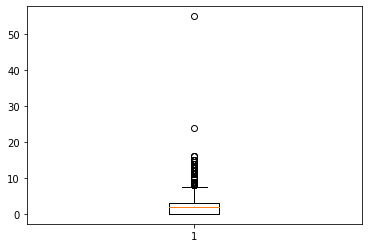

In [138]:
#lets see if there are any outliers present again with boxplot
plt.boxplot(df['Page Views Per Visit'])
plt.show()

In [139]:
#as we can see there are outliers so lets cap them
Q1,Q3 = df['Page Views Per Visit'].quantile([0.25,0.75]).values
print(Q1,Q3)
IQR=Q3-Q1
print(IQR)

0.0 3.0
3.0


In [140]:
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
print(lower_range,upper_range)

-4.5 7.5


<AxesSubplot:xlabel='Page Views Per Visit'>

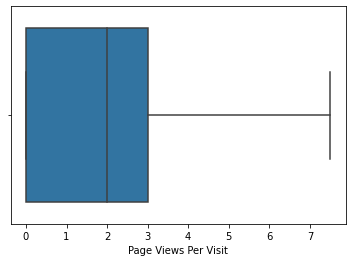

In [141]:
df['Page Views Per Visit'][df['Page Views Per Visit'] <= lower_range] = lower_range
df['Page Views Per Visit'][df['Page Views Per Visit'] >= upper_range] = upper_range
#check outliers in the column now
sns.boxplot(df['Page Views Per Visit'])

In [142]:
df.shape

(9240, 11)

In [143]:
# Now data is all ready and cleaned up

### 3. Visualising the Data

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   object 
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
 10  Last Notable Activity                   9240 non-null   obje

In [145]:
# lets first visualise continous variables

In [146]:
cont_var=(df.select_dtypes(include=['int64','float64'])).columns.tolist()
cont_var

['Lead Number',
 'Converted',
 'Total Time Spent on Website',
 'Page Views Per Visit']

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

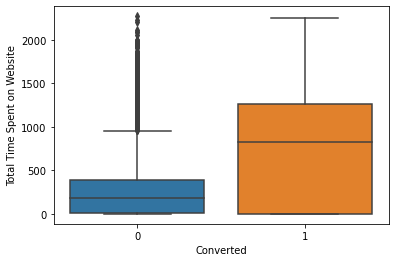

In [147]:
sns.boxplot(x=df['Converted'],y=df['Total Time Spent on Website'])

In [148]:
# from the plot we can say that lead converting spends more time on website.

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

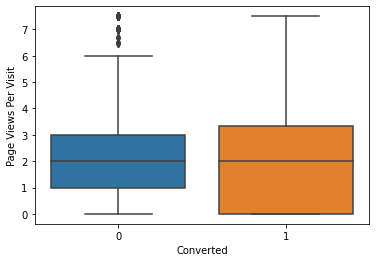

In [149]:
sns.boxplot(x=df['Converted'],y=df['Page Views Per Visit'])

In [150]:
# from the plot we can say leads converting and not convering have very similar page views per visit

In [151]:
#Lets visualise and analyze categorical variables now

In [152]:
cat_var=(df.select_dtypes(include=object)).columns.tolist()
cat_var

['Lead Origin',
 'Lead Source',
 'TotalVisits',
 'Last Activity',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

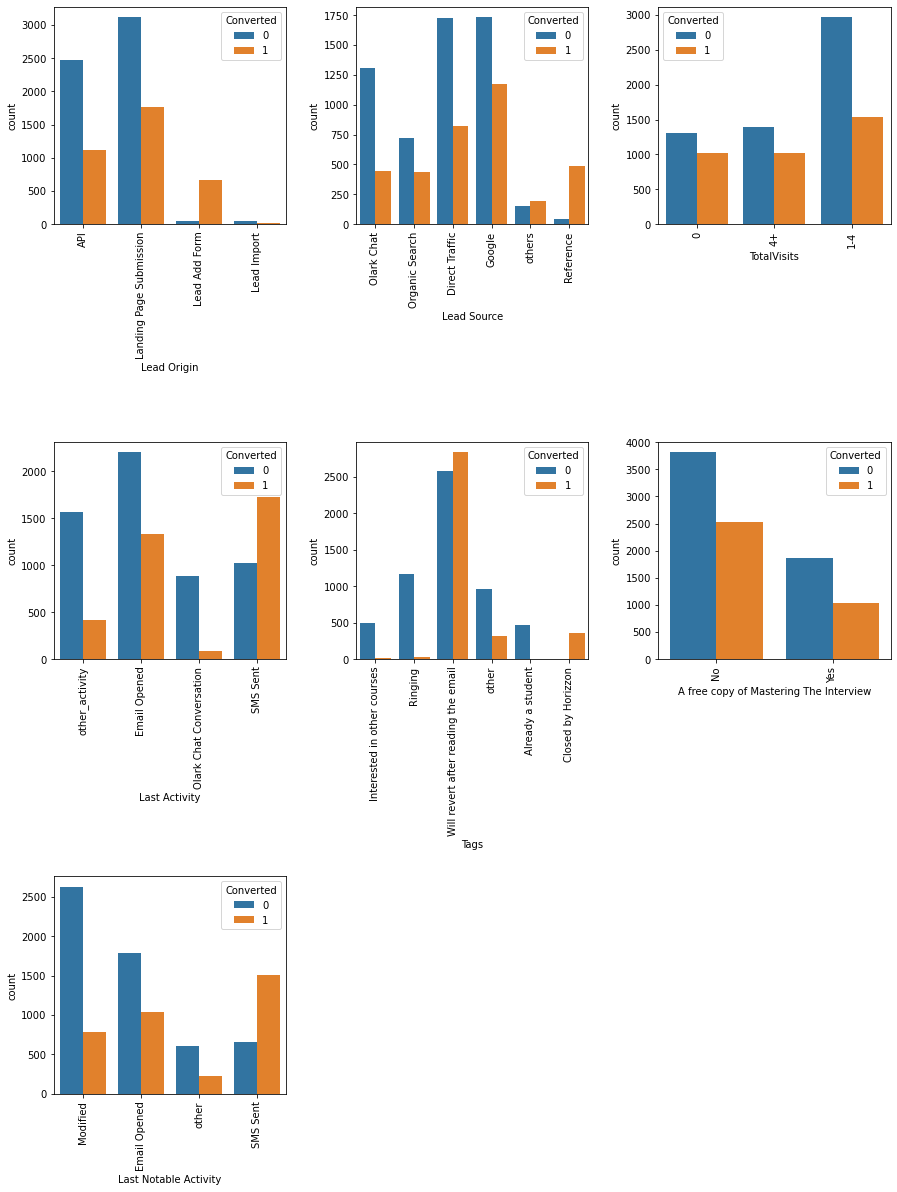

In [153]:
plt.figure(figsize=[15,20])
plt.subplots_adjust(wspace=.3,hspace=1 )
for i in enumerate(cat_var):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1], hue='Converted',data=df)
    plt.xticks(rotation=90)
plt.show()

In [154]:
# people with origine identifier as 'Lead add form' has good convesrion rate, infact very few with this origin fail to convert.
# People coming trough  reference have high convesion rate
# people with tag 'will revert after reading the email' have conversion rate at the same it has highest failed to convert too
# people who have last notable activity and last activity as SMS sent have high conversion rate

### 4. Data Preparation

In [155]:
#lets create dummy variables of all the categorical variables
df.select_dtypes(include=object).columns

Index(['Lead Origin', 'Lead Source', 'TotalVisits', 'Last Activity', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [156]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'TotalVisits', 'Last Activity', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,TotalVisits_1-4,TotalVisits_4+,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_activity,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [157]:
df=pd.concat([df,dummy],axis=1)

In [158]:
df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Tags,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,TotalVisits_1-4,TotalVisits_4+,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_activity,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,660737,API,Olark Chat,0,0,0,0.0,other_activity,Interested in other courses,No,Modified,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,660728,API,Organic Search,0,4+,674,2.5,Email Opened,Ringing,No,Email Opened,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,1-4,1532,2.0,Email Opened,Will revert after reading the email,Yes,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1-4,305,1.0,other_activity,Ringing,No,Modified,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,1,1-4,1428,1.0,other_activity,Will revert after reading the email,No,Modified,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [159]:
#dropping all original columns of which we created dummy variables
df.drop(df[['Lead Origin', 'Lead Source', 'TotalVisits', 'Last Activity', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],axis=1,inplace=True)
df.head()

,Lead Number,Converted,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,TotalVisits_1-4,TotalVisits_4+,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_activity,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,660737,0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,660728,0,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,1,1532,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,660719,0,305,1.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,660681,1,1428,1.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [160]:
df.shape

(9240, 26)

### 5. Test-Train Split

In [161]:
#lets store all independent variables in X
X = df.drop(['Lead Number','Converted'], axis=1)
X.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,TotalVisits_1-4,TotalVisits_4+,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_activity,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,674,2.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1532,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,305,1.0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,1428,1.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [162]:
#lets store target variables in y
y= df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [163]:
#splitting the data in test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [164]:
#feature scaling
scaler = MinMaxScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_others,TotalVisits_1-4,TotalVisits_4+,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_other_activity,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_SMS Sent,Last Notable Activity_other
1871,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6795,0.214349,0.177333,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3516,0.046655,0.333333,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8105,0.541373,0.666667,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
3934,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [165]:
#lets check the conversion rate
df['Converted'].sum()/len(df['Converted'].index)*100

38.53896103896104

In [166]:
# 38.5 % is good conversion rate in data which means data is not highly biased and can be used to create model

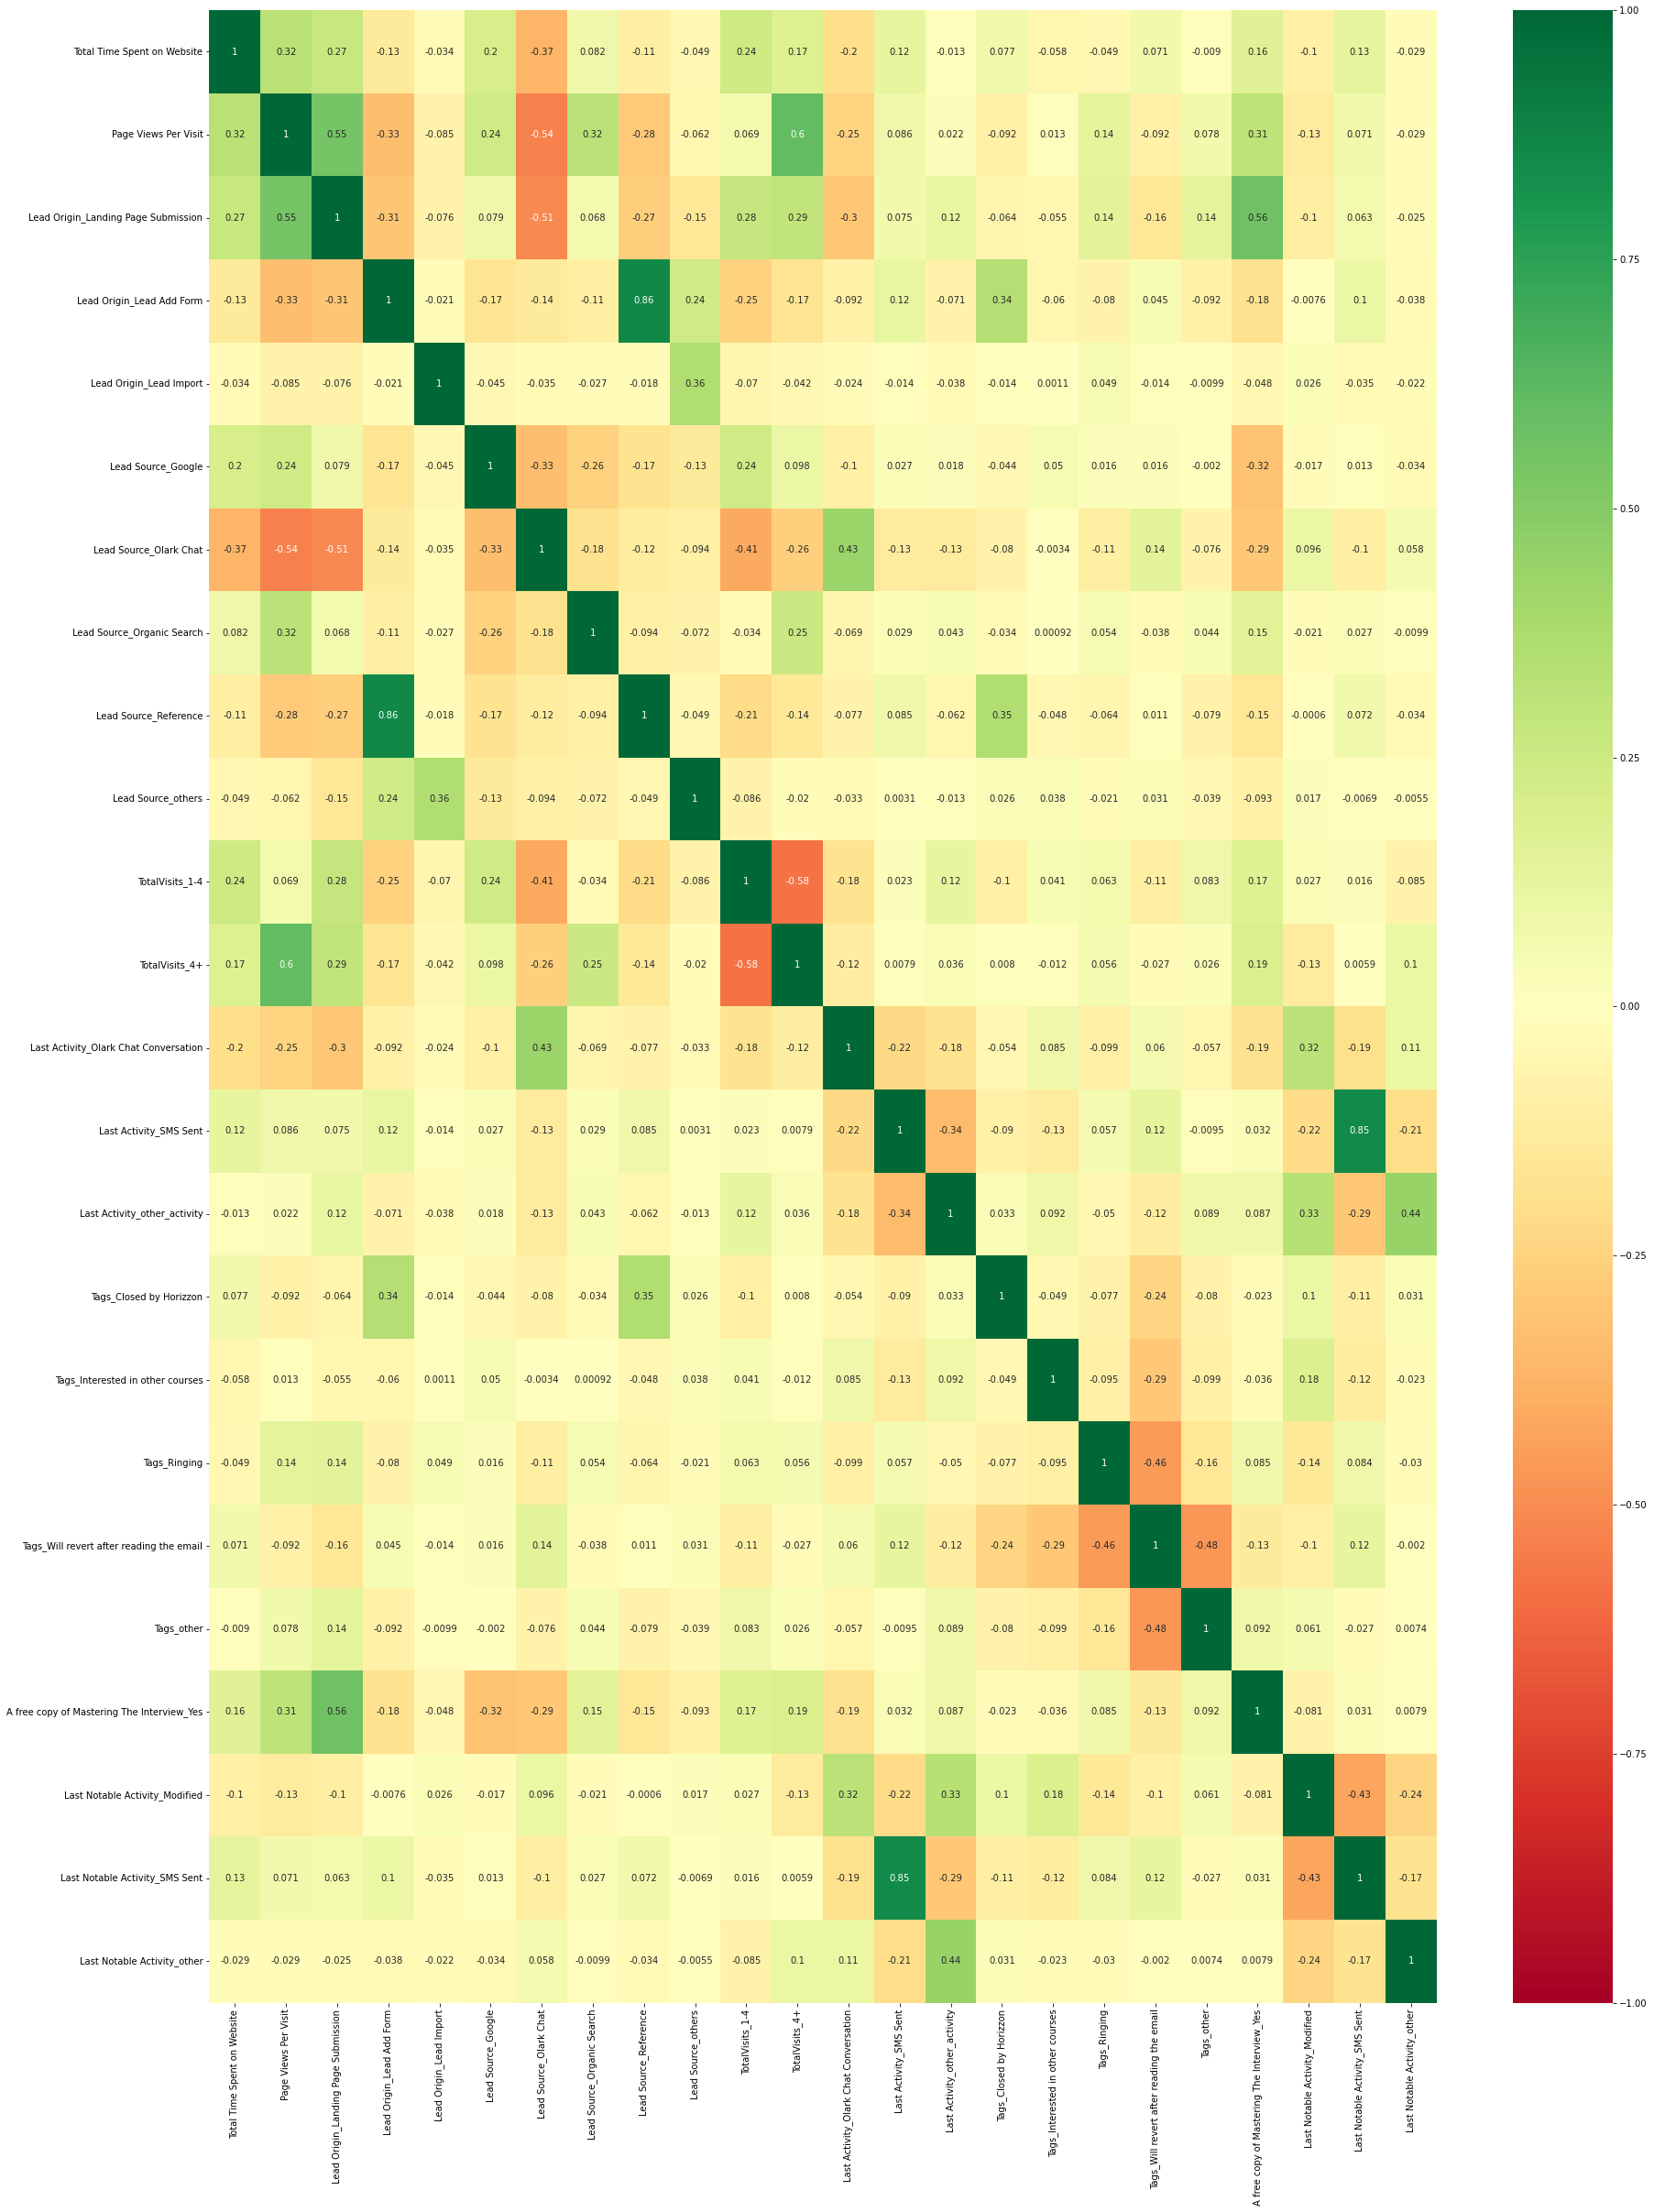

In [167]:
# Checking correlations
plt.figure(figsize = (30, 40))
sns.heatmap(X_train.corr(), annot = True, vmin=-1,cmap='RdYlGn')
plt.show()

In [168]:
# from above plot we can clearly see there are some variables which are highly correlated
# we will use RFE for feature selection

### 6. Feature Selection

In [169]:
#using RFE for feature selection
logreg = LogisticRegression()

In [170]:
#using RFE with output number of variables equal to 15
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train,y_train)

In [171]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Olark Chat', False, 9),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_others', False, 3),
 ('TotalVisits_1-4', True, 1),
 ('TotalVisits_4+', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_other_activity', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', False, 4),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_other', True, 1),
 ('A free copy of Mastering The Interview_Yes', False, 8),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Last Notable Activity_other', False, 6)]

In [172]:
# after using RFE we got these variables
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'TotalVisits_1-4', 'TotalVisits_4+',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_other_activity', 'Tags_Closed by Horizzon',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_other', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [173]:
# these varibales we will be using for the model
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'TotalVisits_1-4', 'TotalVisits_4+',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_other_activity', 'Tags_Closed by Horizzon',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_other', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [174]:
# these are the variales RFE did not select
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_others',
       'Tags_Interested in other courses',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_other'],
      dtype='object')

In [175]:
# its very much inline with our inferences in EDA
# rfe finds 'Tags_Will revert after reading the email' important which we also seen in EDA
# Last activity SMS sent is also rfe find important which we also found in EDA

### 7. Model Building

Model 1

In [176]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2113.5
Date:                Mon, 17 Oct 2022   Deviance:                       4227.1
Time:                        10:05:25   Pearson chi2:                 9.77e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1527      0.317    -13.106      0.000      -4.774      -3.532
Total Time Spent on Website                  4.9801      0.200     24.874      0.000       4.588       5.373
Page Views Per Visit                        -0.4817      0.247     -1.953      0.051      -0.965       0.002
Lead Origin_Lead Add Form                    2.7793      0.229     12.117      0.000       2.330       3.229
Lead Origin_Lead Import                     -0.6943      0.575     -1.208      0.227      -1.821       0.432
TotalVisits_1-4                             -0.8477      0.147     -5.770      0.000      -1.136      -0.560
TotalVisits_4+                              -0.4146      0.188     -2.204      0.028      -0.783      -0.046
Last Activity_Olark Chat Conversation       -1.3296      0.184     -7.237      0.000      -1.690      -0.969
Last Activity_SMS Sent                       0.3484      0.176      1.975      0.048       0.003       0.694
Last Activity_other_activity                -0.6792      0.121     -5.617      0.000      -0.916      -0.442
Tags_Closed by Horizzon                      8.8335      1.056      8.367      0.000       6.764      10.903
Tags_Ringing                                -1.1323      0.377     -2.999      0.003      -1.872      -0.392
Tags_Will revert after reading the email     3.6550      0.305     11.970      0.000       3.057       4.253
Tags_other                                   2.2954      0.317      7.238      0.000       1.674       2.917
Last Notable Activity_Modified              -0.6544      0.117     -5.596      0.000      -0.884      -0.425
Last Notable Activity_SMS Sent               1.3974      0.197      7.091      0.000       1.011       1.784
============================================================================================================
"""

In [177]:
# function to calculate vif
def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [178]:
# Calculate the VIFs for the new model
vifcalc(X_train[col])

,Features,VIF
7,Last Activity_SMS Sent,7.25
14,Last Notable Activity_SMS Sent,6.71
1,Page Views Per Visit,6.64
5,TotalVisits_4+,5.97
4,TotalVisits_1-4,5.90
11,Tags_Will revert after reading the email,3.48
13,Last Notable Activity_Modified,2.99
0,Total Time Spent on Website,2.45
8,Last Activity_other_activity,2.04
6,Last Activity_Olark Chat Conversation,1.68


In [179]:
# Dropping 'Lead Origin_Lead Import' as it has high p value

In [180]:
col = col.drop('Lead Origin_Lead Import')

In [181]:
len(col)

14

Model 2

In [182]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2114.3
Date:                Mon, 17 Oct 2022   Deviance:                       4228.7
Time:                        10:05:25   Pearson chi2:                 9.77e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1713      0.317    -13.178      0.000      -4.792      -3.551
Total Time Spent on Website                  4.9715      0.200     24.842      0.000       4.579       5.364
Page Views Per Visit                        -0.4791      0.247     -1.943      0.052      -0.962       0.004
Lead Origin_Lead Add Form                    2.8006      0.229     12.239      0.000       2.352       3.249
TotalVisits_1-4                             -0.8263      0.146     -5.661      0.000      -1.112      -0.540
TotalVisits_4+                              -0.3941      0.187     -2.103      0.036      -0.761      -0.027
Last Activity_Olark Chat Conversation       -1.3152      0.183     -7.168      0.000      -1.675      -0.956
Last Activity_SMS Sent                       0.3399      0.176      1.929      0.054      -0.006       0.685
Last Activity_other_activity                -0.6756      0.121     -5.587      0.000      -0.913      -0.439
Tags_Closed by Horizzon                      8.8338      1.056      8.367      0.000       6.765      10.903
Tags_Ringing                                -1.1364      0.377     -3.011      0.003      -1.876      -0.397
Tags_Will revert after reading the email     3.6532      0.305     11.966      0.000       3.055       4.252
Tags_other                                   2.2936      0.317      7.233      0.000       1.672       2.915
Last Notable Activity_Modified              -0.6553      0.117     -5.600      0.000      -0.885      -0.426
Last Notable Activity_SMS Sent               1.4089      0.197      7.156      0.000       1.023       1.795
============================================================================================================
"""

In [183]:
#calculate vif for the new model
vifcalc(X_train[col])

,Features,VIF
6,Last Activity_SMS Sent,7.25
13,Last Notable Activity_SMS Sent,6.71
1,Page Views Per Visit,6.64
4,TotalVisits_4+,5.94
3,TotalVisits_1-4,5.85
10,Tags_Will revert after reading the email,3.42
12,Last Notable Activity_Modified,2.98
0,Total Time Spent on Website,2.45
7,Last Activity_other_activity,2.04
5,Last Activity_Olark Chat Conversation,1.67


In [184]:
# 'Last Activity_SMS Sent' has high vif and also its p value is slighly high which is 0.054. we want it below 0.05 and vif also below 5

In [185]:
col = col.drop('Last Activity_SMS Sent')

In [186]:
len(col)

13

Model 3

In [187]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2116.2
Date:                Mon, 17 Oct 2022   Deviance:                       4232.4
Time:                        10:05:26   Pearson chi2:                 9.70e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1925      0.316    -13.257      0.000      -4.812      -3.573
Total Time Spent on Website                  4.9683      0.200     24.834      0.000       4.576       5.360
Page Views Per Visit                        -0.4787      0.246     -1.942      0.052      -0.962       0.004
Lead Origin_Lead Add Form                    2.8304      0.229     12.387      0.000       2.383       3.278
TotalVisits_1-4                             -0.8162      0.146     -5.599      0.000      -1.102      -0.531
TotalVisits_4+                              -0.3736      0.187     -1.995      0.046      -0.741      -0.007
Last Activity_Olark Chat Conversation       -1.4169      0.176     -8.072      0.000      -1.761      -1.073
Last Activity_other_activity                -0.7666      0.111     -6.880      0.000      -0.985      -0.548
Tags_Closed by Horizzon                      8.8107      1.055      8.350      0.000       6.743      10.879
Tags_Ringing                                -1.1140      0.377     -2.954      0.003      -1.853      -0.375
Tags_Will revert after reading the email     3.6828      0.305     12.083      0.000       3.085       4.280
Tags_other                                   2.3210      0.317      7.333      0.000       1.701       2.941
Last Notable Activity_Modified              -0.5302      0.097     -5.473      0.000      -0.720      -0.340
Last Notable Activity_SMS Sent               1.7307      0.105     16.460      0.000       1.525       1.937
============================================================================================================
"""

In [188]:
#calculate vif for the new model
vifcalc(X_train[col])

,Features,VIF
1,Page Views Per Visit,6.64
4,TotalVisits_4+,5.93
3,TotalVisits_1-4,5.84
9,Tags_Will revert after reading the email,3.38
0,Total Time Spent on Website,2.45
11,Last Notable Activity_Modified,2.29
6,Last Activity_other_activity,1.72
12,Last Notable Activity_SMS Sent,1.72
10,Tags_other,1.66
8,Tags_Ringing,1.64


In [189]:
# 'Page Views Per Visit' has high vif and also its p value is slighly high which is 0.052. we want it below 0.05 and vif also below 5

In [190]:
col = col.drop('Page Views Per Visit')
len(col)

12

Model 4

In [191]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2118.1
Date:                Mon, 17 Oct 2022   Deviance:                       4236.1
Time:                        10:05:26   Pearson chi2:                 9.88e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1944      0.317    -13.237      0.000      -4.815      -3.573
Total Time Spent on Website                  4.9656      0.200     24.824      0.000       4.574       5.358
Lead Origin_Lead Add Form                    2.8386      0.229     12.416      0.000       2.391       3.287
TotalVisits_1-4                             -0.9704      0.123     -7.900      0.000      -1.211      -0.730
TotalVisits_4+                              -0.6379      0.130     -4.922      0.000      -0.892      -0.384
Last Activity_Olark Chat Conversation       -1.3907      0.175     -7.964      0.000      -1.733      -1.048
Last Activity_other_activity                -0.7392      0.110     -6.693      0.000      -0.956      -0.523
Tags_Closed by Horizzon                      8.8169      1.055      8.358      0.000       6.749      10.884
Tags_Ringing                                -1.1235      0.378     -2.976      0.003      -1.864      -0.384
Tags_Will revert after reading the email     3.6815      0.305     12.055      0.000       3.083       4.280
Tags_other                                   2.3176      0.317      7.308      0.000       1.696       2.939
Last Notable Activity_Modified              -0.5395      0.097     -5.577      0.000      -0.729      -0.350
Last Notable Activity_SMS Sent               1.7238      0.105     16.416      0.000       1.518       1.930
============================================================================================================
"""

In [192]:
#calculate vif for the new model
vifcalc(X_train[col])

,Features,VIF
2,TotalVisits_1-4,3.79
8,Tags_Will revert after reading the email,3.38
3,TotalVisits_4+,2.53
0,Total Time Spent on Website,2.45
10,Last Notable Activity_Modified,2.28
11,Last Notable Activity_SMS Sent,1.72
5,Last Activity_other_activity,1.69
9,Tags_other,1.66
7,Tags_Ringing,1.63
1,Lead Origin_Lead Add Form,1.55


In [193]:
# this model looks good as it has low p values and vif also
# lets evaluate this model

### 8. Model Evaluation

In [206]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.00487904, 0.39676709, 0.00325566, 0.17600043, 0.25875817,
       0.9713417 , 0.00311007, 0.99902064, 0.27272503, 0.97482864])

In [220]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.004879,1871
1,0,0.396767,6795
2,0,0.003256,3516
3,0,0.176000,8105
4,0,0.258758,3934


In [222]:
#  let's take 0.5 as Cutoff
y_train_pred_final['Converted_pred']=y_train_pred_final['Converted_prob'].apply(lambda x : 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Converted_pred
0,0,0.004879,1871,0
1,0,0.396767,6795,0
2,0,0.003256,3516,0
3,0,0.176000,8105,0
4,0,0.258758,3934,0


In [226]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_pred))

0.8688930117501547


In [227]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_pred)
confusion

array([[3690,  312],
       [ 536, 1930]], dtype=int64)

In [229]:
# Actual/Predicted       not_converted    converted
        # not_converted        3690         312
        # converted            536          1930  

In [230]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [231]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7826439578264396

In [232]:
# Let us calculate specificity
TN / float(TN+FP)

0.9220389805097451

In [233]:
# Calculate false postive rate - predicting conversion when customer does not converted
print(FP/ float(TN+FP))

0.07796101949025487


In [234]:
# positive predictive value 
print (TP / float(TP+FP))

0.8608385370205174


In [235]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8731661145291055


In [236]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [238]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

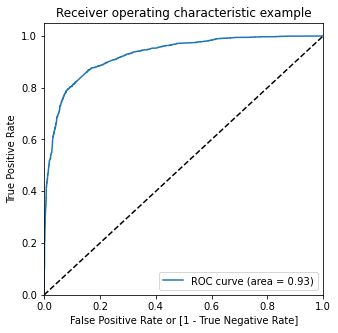

In [240]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [241]:
# Finding Optimal Cutoff Point

In [242]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004879,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.396767,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.003256,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.176000,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.258758,3934,0,1,1,1,0,0,0,0,0,0,0


In [243]:
#calculations for accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.712585     0.962693     0.558471
0.2   0.2  0.783704     0.932279     0.692154
0.3   0.3  0.834261     0.884834     0.803098
0.4   0.4  0.863327     0.815491     0.892804
0.5   0.5  0.868893     0.782644     0.922039
0.6   0.6  0.863636     0.741281     0.939030
0.7   0.7  0.846475     0.669100     0.955772
0.8   0.8  0.807823     0.532847     0.977261
0.9   0.9  0.773964     0.420114     0.992004


<Figure size 1440x1080 with 0 Axes>

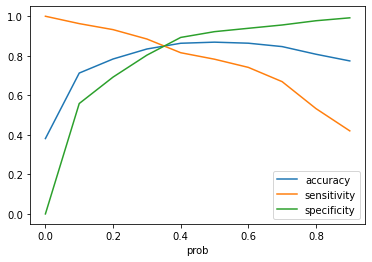

In [245]:
# Plot for accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [246]:
# from the table and graph we can see 0.35 looks like good cutoff point

In [248]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Converted_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.004879,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.396767,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.003256,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.176000,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.258758,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [249]:
#lets see new accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8514223871366728


In [250]:
# accuracy did not fall considerably from earlier

In [251]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion

array([[3366,  636],
       [ 325, 2141]], dtype=int64)

In [253]:
# Actual/Predicted       not_converted    converted
        # not_converted        3366         636
        # converted            325          2141  

In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [258]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8682076236820763

In [259]:
# Let us calculate specificity
TN / float(TN+FP)

0.841079460269865

In [256]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7709758732445084

In [257]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8682076236820763

In [268]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

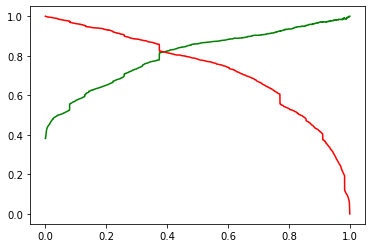

In [269]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
plt.show()

In [270]:
# this curve also shows cutoff around 0.35-0.38

### 9. Making Prediction on test set

In [271]:
# scaling test data using same minmaxscaler
X_test[['Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit']])

In [273]:
# adding constant and making predictions
X_test_sm = sm.add_constant(X_test[col])

In [276]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.941732
2376    0.982868
7766    0.146656
9199    0.002184
4359    0.910981
9186    0.871090
1631    0.743302
8963    0.289545
8007    0.118132
5324    0.643412
dtype: float64

In [278]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [279]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [280]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [281]:
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,4269,0.941732
1,1,2376,0.982868
2,1,7766,0.146656
3,0,9199,0.002184
4,1,4359,0.910981


In [282]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead Number','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [283]:
#making prediction using probability and threshold which is already define as .35
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [284]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,Lead_Score,final_test_predicted
0,4269,1,0.941732,94,1
1,2376,1,0.982868,98,1
2,7766,1,0.146656,15,0
3,9199,0,0.002184,0,0
4,4359,1,0.910981,91,1


In [285]:
#lets see new accuracy
print(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_test_predicted))

0.8441558441558441


In [286]:
#Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_test_predicted )
confusion2

array([[1390,  287],
       [ 145,  950]], dtype=int64)

In [287]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [289]:
sum(sum(confusion2))

2772

In [293]:
#Lets see accuracy using confusion matrix
accuracy = (TP+TN)/sum(sum(confusion2))
accuracy

0.8441558441558441

In [296]:
# Lets see sensitivity
sensitivity = TP/float(TP+FN)
sensitivity

0.867579908675799

In [298]:
# Lets see specificity
specificity= TN / float(TN+FP)
specificity

0.8288610614192009

In [300]:
#lets see precision
TP/float(TP+FP)

0.7679870654810024

#### Conclusion: So the model 4 looks good as it have high accuracy, sensitivity and specificity which is around 85%

In [301]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2118.1
Date:                Mon, 17 Oct 2022   Deviance:                       4236.1
Time:                        20:13:41   Pearson chi2:                 9.88e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1944      0.317    -13.237      0.000      -4.815      -3.573
Total Time Spent on Website                  4.9656      0.200     24.824      0.000       4.574       5.358
Lead Origin_Lead Add Form                    2.8386      0.229     12.416      0.000       2.391       3.287
TotalVisits_1-4                             -0.9704      0.123     -7.900      0.000      -1.211      -0.730
TotalVisits_4+                              -0.6379      0.130     -4.922      0.000      -0.892      -0.384
Last Activity_Olark Chat Conversation       -1.3907      0.175     -7.964      0.000      -1.733      -1.048
Last Activity_other_activity                -0.7392      0.110     -6.693      0.000      -0.956      -0.523
Tags_Closed by Horizzon                      8.8169      1.055      8.358      0.000       6.749      10.884
Tags_Ringing                                -1.1235      0.378     -2.976      0.003      -1.864      -0.384
Tags_Will revert after reading the email     3.6815      0.305     12.055      0.000       3.083       4.280
Tags_other                                   2.3176      0.317      7.308      0.000       1.696       2.939
Last Notable Activity_Modified              -0.5395      0.097     -5.577      0.000      -0.729      -0.350
Last Notable Activity_SMS Sent               1.7238      0.105     16.416      0.000       1.518       1.930
============================================================================================================
"""

## Final Conclusion : 
### All the variables using which we created the model are highly responsible for Converting lead to Hot lead or cold lead. Variables having postive coeficient are the one which are correlated for conversion of hot leads while variables with negative coeficients are correlated for non conversion of leads which is said as cold leads.
### Tags_Closed by Horizzon is the variable with highest correlation